In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/housing_edf82b23-51e2-4f57-887d-6be67da34d27.data', header=None, sep='\s+')
df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot: >

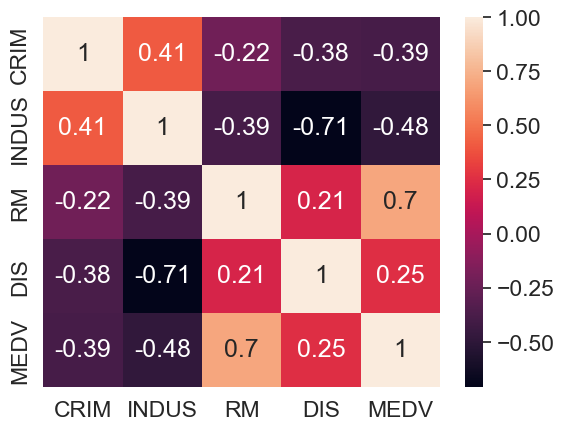

In [19]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)


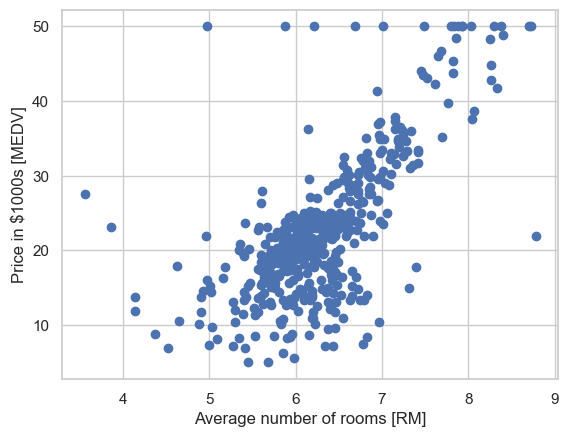

In [6]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
print('La pendiente del modelo es: ', model.coef_)
print('El intercepto del modelo es: ', model.intercept_)

La pendiente del modelo es:  [[9.34830141]]
El intercepto del modelo es:  [-36.2463189]


In [20]:
room = 5
price = model.predict([[room]])
print('El precio de una casa de {} habitaciones es: ${}'.format(room, price[0][0]))

El precio de una casa de 5 habitaciones es: $10.495188134350691


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
y_pred = model.predict(x_train)

In [23]:
r2 = r2_score(y_train, y_pred)
print('R2 score: ', r2)

R2 score:  0.5050658352776293


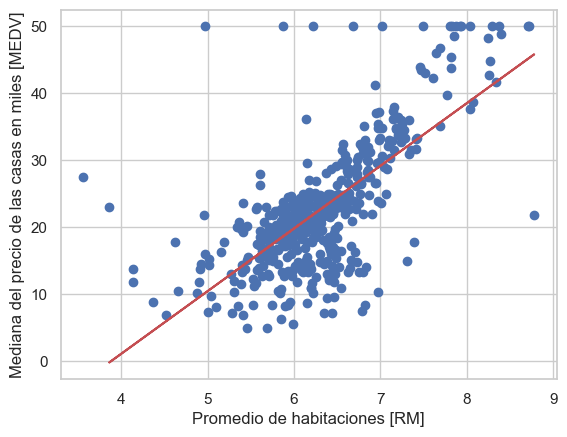

In [26]:
plt.scatter(df['RM'], df['MEDV'])
plt.plot(x_train, y_pred, color ='r')
plt.ylabel('Mediana del precio de las casas en miles [MEDV]')
plt.xlabel('Promedio de habitaciones [RM]')
plt.show()